<a id='Title-Feature-Extraction-Unified'></a>
<h1 style="color:SlateGray;">Feature Extraction (Unified)</h1>

**Input dataset**

Kaggle Cats and Dogs: a set of evenly split cat and dog images.

**Output classification**

Predict whether an image contains a cat or a dog.

<h2 style="color:SlateGray;">Background</h2>

**Pre-trained models**

[*VGG16*](8_Feature_Extraction_Separated.ipynb#Pre-trained-models-VGG16)

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)

[*Dropout*](5_Overfitting_And_Underfitting.ipynb#Layers-Dropout)

**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](2_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](2_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import os

base_dir = r'./cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras.applications import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

model.save('cats_and_dogs_small_3.h5')

Epoch 1/30
 - 19s - loss: 0.6048 - acc: 0.6800 - val_loss: 0.4600 - val_acc: 0.8310
Epoch 2/30
 - 16s - loss: 0.4857 - acc: 0.7810 - val_loss: 0.3754 - val_acc: 0.8550
Epoch 3/30
 - 16s - loss: 0.4313 - acc: 0.8090 - val_loss: 0.3338 - val_acc: 0.8600
Epoch 4/30
 - 17s - loss: 0.4148 - acc: 0.8115 - val_loss: 0.3118 - val_acc: 0.8780
Epoch 5/30
 - 17s - loss: 0.3899 - acc: 0.8280 - val_loss: 0.2971 - val_acc: 0.8810
Epoch 6/30
 - 17s - loss: 0.3842 - acc: 0.8365 - val_loss: 0.2885 - val_acc: 0.8850
Epoch 7/30
 - 18s - loss: 0.3700 - acc: 0.8375 - val_loss: 0.2768 - val_acc: 0.8950
Epoch 8/30
 - 17s - loss: 0.3541 - acc: 0.8545 - val_loss: 0.2809 - val_acc: 0.8760
Epoch 9/30
 - 18s - loss: 0.3528 - acc: 0.8510 - val_loss: 0.2741 - val_acc: 0.8820
Epoch 10/30
 - 18s - loss: 0.3418 - acc: 0.8485 - val_loss: 0.2616 - val_acc: 0.8940
Epoch 11/30
 - 18s - loss: 0.3365 - acc: 0.8540 - val_loss: 0.2617 - val_acc: 0.8900
Epoch 12/30
 - 18s - loss: 0.3279 - acc: 0.8710 - val_loss: 0.2545 - val_a

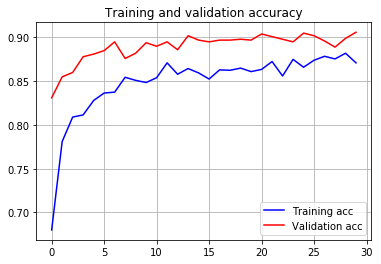

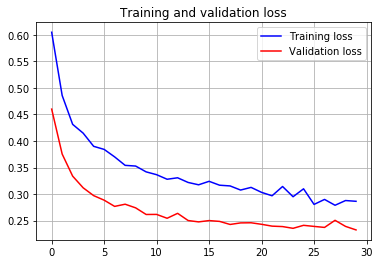

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()